<a href="https://colab.research.google.com/github/Migaalee/machine_learning/blob/main/Tutorials_AA_Migla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description

## Explanation of the dataset.

# Import all packages that will be used

In [64]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

#ScikitLearn

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

from google.colab import files #this is to load files from your local disk

In [2]:
data = files.upload()
 

Saving data.txt to data.txt


# Store all functions from the classes that might be useful

In [90]:
# Function to exapnd data to get different models

def poly_16features(X):
    """Expand data polynomially
    """
    X_exp = np.zeros((X.shape[0],X.shape[1]+14))
    X_exp[:,:2] = X 
    X_exp[:,2] = X[:,0]*X[:,1]
    X_exp[:,3] = X[:,0]**2
    X_exp[:,4] = X[:,1]**2
    X_exp[:,5] = X[:,0]**3
    X_exp[:,6] = X[:,1]**3
    X_exp[:,7] = X[:,0]**2*X[:,1]
    X_exp[:,8] = X[:,1]**2*X[:,0]
    X_exp[:,9] = X[:,0]**4
    X_exp[:,10] = X[:,1]**4
    X_exp[:,11] = X[:,0]**3*X[:,1]
    X_exp[:,12] = X[:,1]**3*X[:,0]
    X_exp[:,13] = X[:,0]**2*X[:,1]**2
    X_exp[:,14] = X[:,0]**5
    X_exp[:,15] = X[:,1]**5        
    return X_exp

def poly_mat(reg,X_data,feats,ax_lims):
    """create score matrix for contour
    """
    Z = np.zeros((200,200))
    xs = np.linspace(ax_lims[0],ax_lims[1],200)
    ys = np.linspace(ax_lims[2],ax_lims[3],200)
    X,Y = np.meshgrid(xs,ys)
    points = np.zeros((200,2))
    points[:,0] = xs
    for ix in range(len(ys)):
        points[:,1] = ys[ix]
        x_points=poly_16features(points)[:,:feats]
        Z[ix,:] = reg.decision_function(x_points)
    return (X,Y,Z)

def create_plot(X_r, Y_r, X_t, Y_t, feats, best_c):
    """create imege with plot for best classifier"""
    ax_lims=(-3,3,-3,3)
    plt.figure(figsize=(8,8), frameon=False)
    plt.axis(ax_lims)
    reg = LogisticRegression(C=best_c, tol=1e-10)
    reg.fit(X_r,Y_r)
    plotX,plotY,Z = poly_mat(reg,X_r,16,ax_lims)
    plt.contourf(plotX,plotY,Z,[-1e16,0,1e16], colors = ('b', 'r'),alpha=0.5)
    plt.contour(plotX,plotY,Z,[0], colors = ('k'))
    plt.plot(X_r[Y_r>0,0],X_r[Y_r>0,1],'or')
    plt.plot(X_r[Y_r<=0,0],X_r[Y_r<=0,1],'ob')
    plt.plot(X_t[Y_t>0,0],X_t[Y_t>0,1],'xr',mew=2)
    plt.plot(X_t[Y_t<=0,0],X_t[Y_t<=0,1],'xb',mew=2)
    plt.savefig('final_plot.png', dpi=300)
    plt.close()
    

# Calculate training and validation errors for each fold using Brier score
def calc_fold(feats, X,Y, train_ix,test_ix,C=1e12):  #number of features, matrix with features, label classes, indexes to use for points in training and validation, large C regularization parameter (=almost no regularization)
  """return classification error for train and test sets"""
  reg = LogisticRegression(C=C, tol=1e-10) # make logistic regression object
  reg.fit(X[train_ix,:feats],Y[train_ix]) # fit with data that was chosen by kfold for training, :feats will fit 6 features if we say 6 in a function
  prob = reg.predict_proba(X[:,:feats])[:,1] #Brier score, which is specific for logistic. Computes prob that point belongs to class 1 [:,1] using all features X[:,:feats]
  squares = (prob-Y)**2 #Brier
  return (np.mean(squares[train_ix]),np.mean(squares[test_ix]))

#instead of calculating Brier score we could use "test_error = 1-reg.score(X_t,Y_t)". This would compare different classifiers

    


# Tutorial 1

In [8]:
data = files.upload()

Saving planets.csv to planets.csv


In [16]:
def load_planet_data(file_name):
    """Return matrix with orbital radius and period"""
    rows=[]
    lines=open(file_name).readlines()
    for line in lines[1:]:
        parts=line.split(',')
        rows.append((float(parts[1]),float(parts[2])))
    return numpy.array(rows)

data=load_planet_data('planets.csv')



### Exercise 1.5

In [14]:
import math
pi=numpy.pi
r1=0.72*1.496e11
T1=0.62*3.16e7
G=6.67e-11

#This is formula that calculates M
M=(4*math.pow(math.pi,2)*math.pow(r1,3))/(math.pow(T1,2)*6.67e-11)
print(M)


r=data[:,0]*1.496e11
T=data[:,1]*3.16e7
print(r)
print(T)


d=4*pow(numpy.pi,2)*pow(data[:,0]*1.496e11,3)/(pow(data[:,1]*3.16e7,2)*G)

print(d)


mean=numpy.mean(d)
print(mean)
stdev=numpy.std(d)
print(stdev)

1.9269419362950405e+30
[5.834400e+10 1.077120e+11 1.496000e+11 2.273920e+11 7.779200e+11
 1.427184e+12 2.869328e+12 4.496976e+12]
[7.584000e+06 1.959200e+07 3.160000e+07 5.940800e+07 3.747760e+08
 9.309360e+08 2.654716e+09 5.207680e+09]
[2.04374099e+30 1.92694194e+30 1.98451560e+30 1.97183052e+30
 1.98378760e+30 1.98533664e+30 1.98398488e+30 1.98475558e+30]
1.9831117180025922e+30
2.9514956874944806e+28


[ 0.1079885   2.30608244 -1.56589092]


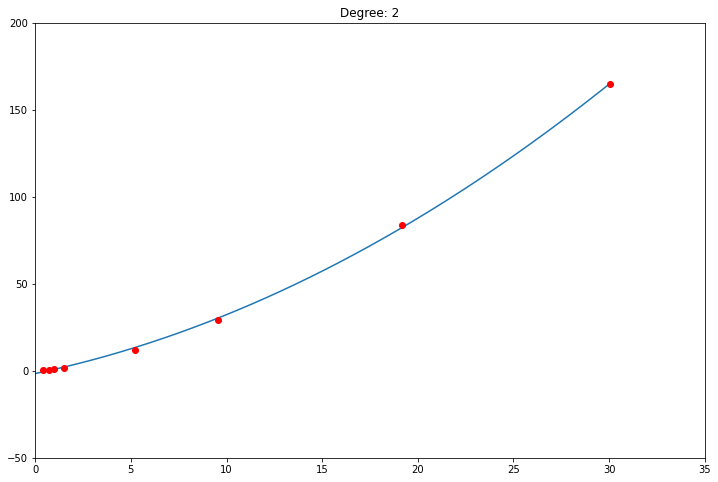

In [15]:
x = data[:,0]
y = data[:,1]
coefs = np.polyfit(x,y,2)

print(coefs)

pxs = np.linspace(0,max(x),200)
poly = np.polyval(coefs,pxs)

#Plot figure 

plt.figure(figsize=(12, 8))
plt.axis([0,35,-50,200])
plt.plot(pxs, poly, '-')
plt.plot(x, y, 'or')
plt.title('Degree: 2')
plt.show()
#plt.savefig('polynomial.png') either save or display on console, both wont work
plt.close()

### Exercise 1.6

In [17]:
mat = files.upload()

Saving polydata.csv to polydata.csv


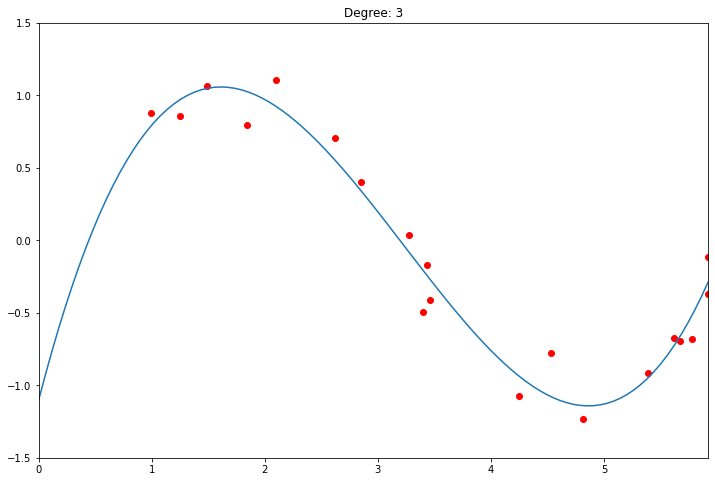

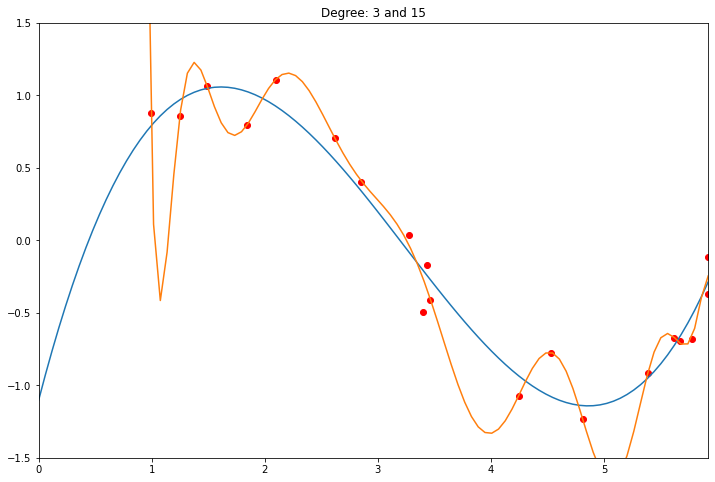

In [18]:
mat = np.loadtxt('polydata.csv',delimiter=';')
x = mat[:,0]
y = mat[:,1]
coefs_3 = np.polyfit(x,y,3)
coefs_15=np.polyfit(x,y,15)
pxs = np.linspace(0,max(x),100)
poly = np.polyval(coefs_3,pxs)
poly15 = np.polyval(coefs_15,pxs)

#Third degree poly
plt.figure(figsize=(12, 8))
plt.plot(x,y,'or')
plt.plot(pxs,poly,'-')
plt.axis([0,max(x),-1.5,1.5])
plt.title('Degree: 3')
plt.show()
#plt.savefig('degree3.png')
plt.close()


#15th degree poly superimposed


plt.figure(figsize=(12, 8))
plt.plot(x,y,'or')
plt.plot(pxs,poly,'-')
plt.plot(pxs,poly15,'-')
plt.axis([0,max(x),-1.5,1.5])
plt.title('Degree: 3 and 15')
plt.show()
#plt.savefig('degree3.png')
plt.close()


# Tutorial 2

In [110]:
data = files.upload()

Saving data.txt to data (2).txt


##### Load data and scale data

In [117]:
data = np.loadtxt("bluegills.txt", delimiter="\t",skiprows=1)
x,y = (data[:,0], data[:,1])
#print(mat)
means = np.mean(data,0)
devs = np.std(data,0)
data = (data-means)/devs

##### Split data into training, test and validation datasets

In [118]:
def random_split(data,test_points):
 """return two matrices splitting the data at random
 """
 ranks = np.arange(data.shape[0])
 np.random.shuffle(ranks)
 train = data[ranks>=test_points,:]
 test = data[ranks<test_points,:]
 return train,test

train, temp = random_split(data, 39)
valid, test = random_split(temp, 20)

##### Find the best model (hypothesis class)

In [119]:
def mean_square_error(data,coefs):
 """Return mean squared error
 X on first column, Y on second column
 """
 pred = np.polyval(coefs,data[:,0])
 error = np.mean((data[:,1]-pred)**2)
 return error

best_err = 10000000 # very large number
for degree in range(1,7):
    coefs = np.polyfit(train[:,0],train[:,1],degree)
    valid_error = mean_square_error(valid,coefs)
    if valid_error < best_err:
        best_err = valid_error
        best_coef = coefs
        best_degree = degree
        
test_error = mean_square_error(test,best_coef)
print('The best degree is',best_degree,'\n', 'The test error is', test_error)

The best degree is 5 
 The test error is 0.3010468614112063


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


##### Plot data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


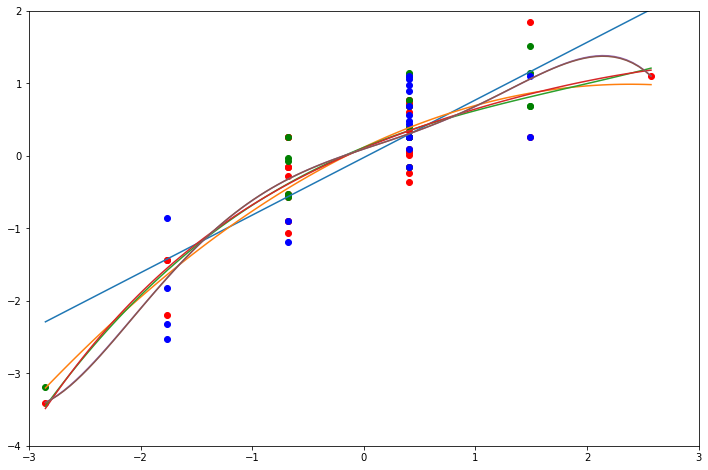

In [120]:
coefs=[] #save 
poly=[]
pxs = np.linspace(min(data[:,0]),max(data[:,0]),100) #where we should start coordinates

for degree in range(1,7):
    coefs.append(np.polyfit(train[:,0],train[:,1],degree))
    poly.append(np.polyval(coefs[degree-1],pxs))
    
plt.figure(figsize=(12, 8))
plt.plot(train[:,0], train[:,1],'bo', color='red')
plt.plot(valid[:,0], valid[:,1],'bo', color='green')
plt.plot(test[:,0], test[:,1],'bo', color='blue')
for py in poly:
    plt.plot(pxs,py)
plt.axis([-3,3,-4,2])
plt.show()

# Tutorial 3

In [121]:
data = files.upload()

Saving data.txt to data (3).txt


In [122]:
mat = np.loadtxt("data.txt", delimiter=",")
#print(mat)

###### Load, shuffle and standardize features

In [123]:
data = shuffle(mat)
Ys = data[:,0]
Xs = data[:,1:]
means = np.mean(Xs, axis = 0)
stdvs = np.std(Xs,axis = 0)
Xs = (Xs-means)/stdvs
#print(Xs)

##### Expand features to create different models

In [124]:
Xs = poly_16features(Xs)
#print(Xs)

### Use stratified sampling and split data into training and testing

In [125]:
X_r, X_t, Y_r, Y_t = train_test_split(Xs, Ys, test_size = 0.33, stratify = Ys) # why do we stratify class labels and not Xs and Ys together

##### Generate fold indexes with kfold and StratifiedFold (examples)

In [78]:
#Using just kfold
#kf = KFold(n_splits=10)
#for train, valid in kf.split(Xr):
#  print(train,valid)



In [79]:
#Using stratified kfold (so that classes are distributed proportionally)
#kf2 = StratifiedKFold(n_splits=10)
#for train, valid in kf2.split(Yr,Yr):
#  print(train, valid)


##### Split using 10 fold Stratified sampling and calculate errors (Brier score in this example)

In [130]:
train_err=[]
valid_err=[]
folds = 10
kf = StratifiedKFold(n_splits=folds)
for feats in range(2,16):
  tr_err = va_err = 0
  for tr_ix,va_ix in kf.split(Y_r,Y_r):
    r,v = calc_fold(feats,X_r,Y_r,tr_ix,va_ix)
    tr_err += r
    va_err += v
  train_err.append(tr_err/folds)
  valid_err.append(va_err/folds)
  print(feats,':', tr_err/folds,va_err/folds)

2 : 0.05682780721981258 0.07518673576232612
3 : 0.05710363297432325 0.07895610864014396
4 : 0.05486624428478243 0.08086969016667966
5 : 0.05327126859137592 0.08575113012975802
6 : 3.135983585615772e-19 0.05497366312447607
7 : 5.1662056419648766e-20 0.0581180355927707
8 : 8.116937364888027e-20 0.05808462013103906
9 : 2.892678227271235e-20 0.03329383901249165
10 : 3.436336453159118e-20 0.04307050004171521
11 : 1.9164165014732522e-19 0.049986216426656786
12 : 3.17192884385211e-20 0.04831309541539745
13 : 8.84289023128983e-20 0.05001284626552925
14 : 7.876708367126208e-20 0.06617690543134891
15 : 5.2301603941477794e-20 0.049987289157096486


#####  Plot the training and crossvalidation error for the different models to select the best one.

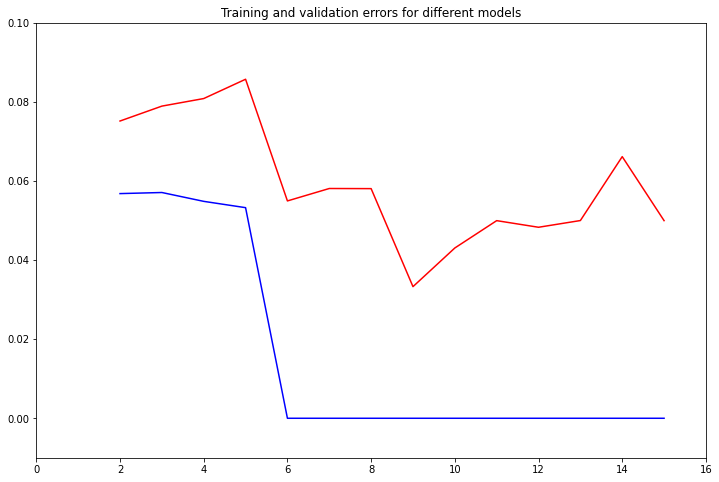

In [131]:
feats= np.array(range(2,16))
plt.figure(figsize=(12, 8))
plt.plot(feats, train_err, c='b')
plt.plot(feats, valid_err, c='r')
plt.axis([0, 16,-0.01,0.1])
plt.title('Training and validation errors for different models')
plt.show()
plt.close()


##### Choose best model

In [135]:
print("best model is: ", str(np.argmin(valid_err)+2))

best model is:  9


##### Calculate test error based on the model with 9 features

In [136]:
reg = LogisticRegression(C=1e12, tol=1e-10)
reg.fit(X_r[:,:9],Y_r) #re-fit all training data with training dataset 
prob = reg.predict_proba(X_t[:,:9])[:,1] # do not forget to calculate error with test!!! dataset
squares = (prob-Y_t)**2
print ('The test error is', np.mean(squares))

The test error is 8.96849134418222e-19
